<a href="https://colab.research.google.com/github/Iam-whizzy/DataScience/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Computer vision: Artificial Intelligence where machines can classify an image
# Convolutional Layers: Image Processing
# ANN
# Dataset: Cifar10 ->

In [29]:
from keras import datasets, layers, models
import tensorflow as tf

In [30]:
# Load Cifar10 Dataset (Images with their labels)
# 32 x 32 pixel, colored/grey_scale
# 32 x 32 -> 784 pixels
# 16 x 16 -> 256 (0-255 maximum)
(training_images, training_labels), (testing_images, testing_labels) = tf.keras.datasets.cifar10.load_data()

In [31]:
# Image Pre Processing
training_images, testing_images = training_images/255, testing_images/255

In [32]:
# Determine the labels and store them in a list
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", " Truck"]

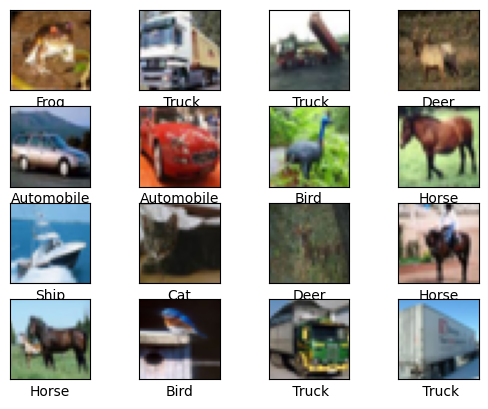

In [33]:
# Visualize Sample Images
# Subplot can draw other many plots
import matplotlib.pyplot as plt
for i in range(16):
      plt.subplot(4,4, i+ 1)
      plt.xticks([])
      plt.yticks([])
      plt.imshow(training_images[i], cmap = plt.cm.binary)
      plt.xlabel(class_names[training_labels[i][0]])
plt.show()

In [37]:
# Total Images and labels -> 60,000
# Training -> 20,000
# Testing -> 4000

training_images = training_images[:20000]
training_labels = training_labels[:20000]


testing_images= testing_images[:4000]
testing_labels = testing_labels[:4000]

In [47]:
# Convolutional Layer
model = models.Sequential()

# Input Layer -> Images
# 3, 3 matrix is kernel size - used to extract a feature
# 3 for RGB
# Feature Extraction
# Maximum Pooling
model.add(layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (16,16, 3)))
model.add(layers.MaxPool2D(2,2))

# Hidden Layers
model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D(2,2))

# model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
# model.add(layers.MaxPool2D(2,2))

# Flattening
# 16x16 -> 256 neurons
model.add(layers.Flatten())


In [ ]:
# ANN Layers -> Dense -> 32

model.add(layers.Dense(32, activation = 'relu'))

# Output Layer
# Sigmoid -> One Output
# Softmax -> 10

model.add(layers.Dense(32, activation = 'softmax'))


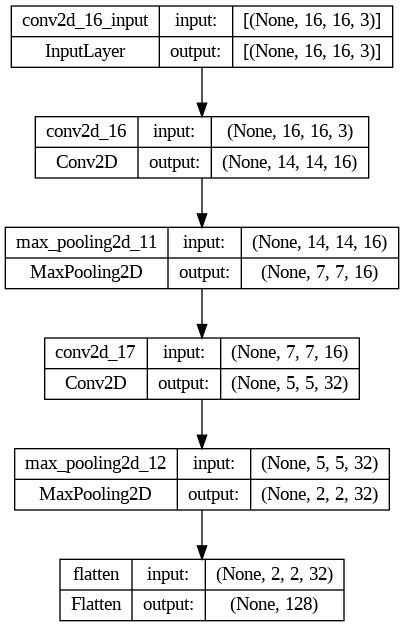

In [48]:
from keras.utils import plot_model
plot_model(model, to_file='ann_model.png', show_shapes=True)

In [ ]:
# Adam - reduce loss and increase accuracy
model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy", "mape"])

In [ ]:
# Fit the training images and labels
# Batch size if not specified it takes the default 32
model.fit(training_images, training_labels, epochs = 10)